# Alternative Credit Scoring Model
The model that I have made uses 14 features of an applicant to give them a score between 0 to 900, that helps in determining whether they should be given a loan or not. The model can handle the applicants that don’t have an existing credit history as well. I have prepared the dataset myself using packages from Python (numpy and pandas) and it has 1000 applicants in it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(5)

## The 14 columns I have selected for the model are as follows along with their admissable values

# 1. Age
Integer : Value between 18-70 years with biasing towards younger candidates.

# 2. Gender
String : Male or Female with biasing towards Males

# 3. Dependents
Integer : Number of dependents (spouse/children/family) on the applicant between 1 to 5. Applicants with less number of dependents get a bonus whereas applicants with more number of dependents are penalized.

# 4. Education
String : Under-Graduate, Graduate or Masters degree. A high degree gets a bonus score.

# 5. Employment Duration
Integer : Value between 0 to 40 months. Bonus score towards applicants having higher duration and penalty for lower duration.

# 6. Existing_Credit_History
Integer : A score of previous credit history (if existing) between 0 to 800. It is 0 for a fresh applicant.

# 7. Basic_Fraud_Threat
String : Expectation of an applicant to do a fraud (High, Medium, Low). Derived from Reference Credit Score and Delinquent Payment. Harsh penalty for High threat.

# 8. Annual Income
Integer : Value between 2.4 lakhs to 24 lakhs. Bonus score towards applicants having high income and penalty for applicants having lower income.

# 9. Reference_Credit_Score
Integer : Value between 0 to 800. 0 for applicants with no references. High credit score leads to a bonus whereas low credit score leads to a small penalty.

# 10. Proof of Identity
String : Whether an applicant showed his proof of identity or not (Y or N). Penalzied applicants who didn't show proof of identity.

# 11. Delinquent_Payment
Integer : Number of overdues/fines on an applicant (0 to 5). Bonus score for lower delinquent payments and penalty for high number of delinquent payments.

# 12. Current_Residence_Duration
Integer : Duration of an applicant's current residence between 0 to 5 years. Bonus score for higher duration and penalty for lower duration.

# 13. Foreign_Worker
String : whether an applicant is a foreign worker or not (Y or N). Penalty for being a foreign worker.

# 14. Known Debt
String : Known debt level on an applicant (High, Medium, Low). Penalty for high level and bonus score for lower level.

In [3]:
columns = ["Age",
           "Gender",
           "Dependents",
           "Education",
           "Employment_Duration",
           "Existing_Credit_History",
           "Basic_Fraud_Threat",
           "Annual_Income",
           "Reference_Credit_Score",
           "Proof_of_Identity",
           "Delinquent_Payment",
           "Current_Residence_Duration",
           "Foreign_Worker",
           "Known_Debt"]

# Now, I create a dataframe using pandas and initialize values for 1000 applicants.
I have used numpy's random methods to generate a variety of applicant possibilities

In [4]:
data = pd.DataFrame(columns = columns)

In [5]:
data["Age"] = np.random.randint(18,70,size=1000)

In [6]:
data["Gender"] = np.random.choice(['Male','Female'],size=1000)

In [7]:
data["Dependents"] = np.random.randint(1,5,size=1000)

In [8]:
data["Education"] = np.random.choice(['Graduate','Masters','Under_graduate'],p=[0.6,0.1,0.3],size=1000)

In [9]:
data["Employment_Duration"] = np.random.randint(0,40,size=1000)

In [10]:
data["Existing_Credit_History"] = np.random.choice([0,100,200,300,400,500,550,600,650,680,700,730,760,790,800],size=1000)

In [11]:
data["Delinquent_Payment"] = np.random.choice([0,1,2,3,4,5],p=[0.7,0.12,0.08,0.06,0.03,0.01],size=1000)

In [12]:
data["Reference_Credit_Score"] = np.random.randint(0,800,size=1000)

In [13]:
k= 0
fraud = []
while(k<1000):
    ref = data["Reference_Credit_Score"][k]
    delin = data["Delinquent_Payment"][k]
    if (ref<=100 or delin>=4):
        fraud.append('High')
    elif((ref > 100 and ref < 500) or (delin<=3 and delin>1)):
        fraud.append('Medium')
    elif(ref>=500 and delin<=1):
        fraud.append('Low')
    k+=1
    
data["Basic_Fraud_Threat"] = fraud

In [14]:
data["Annual_Income"] = np.random.randint(240000,2400000,size=1000)

In [15]:
data["Proof_of_Identity"] = np.random.choice(['Y','N'],p=[0.9,0.1],size=1000)

In [16]:
data["Current_Residence_Duration"] = np.random.randint(0,5,size=1000)

In [17]:
data["Foreign_Worker"] = np.random.choice(['Y','N'],size=1000,p=[0.1,0.9])

In [18]:
data["Known_Debt"] = np.random.choice(['High','Medium','Low'],size=1000)

# Final data obtained

In [19]:
data

,Age,Gender,Dependents,Education,Employment_Duration,Existing_Credit_History,Basic_Fraud_Threat,Annual_Income,Reference_Credit_Score,Proof_of_Identity,Delinquent_Payment,Current_Residence_Duration,Foreign_Worker,Known_Debt
0,53,Female,1,Under_graduate,23,680,High,1668606,350,Y,5,4,N,High
1,32,Male,2,Under_graduate,33,400,High,2098236,1,Y,0,4,N,Medium
2,65,Female,3,Graduate,2,730,Medium,335996,335,Y,0,1,N,Medium
3,56,Male,4,Graduate,23,550,Medium,1003722,259,Y,0,3,N,Medium
4,34,Male,2,Under_graduate,39,650,Medium,240792,120,Y,0,0,N,Low
5,27,Female,4,Graduate,7,600,Medium,1488304,454,Y,1,0,N,Medium
6,26,Female,3,Graduate,35,790,Medium,752198,374,Y,3,4,N,Low
7,54,Female,2,Under_graduate,27,400,Medium,2215279,252,Y,0,3,N,Medium
8,57,Female,4,Masters,10,0,Low,1645995,600,Y,0,4,Y,Medium
9,45,Female,4,Masters,36,650,Medium,992248,473,N,1,1,N,Low


# Now, I handle the categorical features of my dataset and convert them into numbers to use a machine learning algorithm on them

## Gender
1 : Male <br/>
0 : Female

## Education
2 : Masters <br/>
1 : Graduate <br/>
0 : Under_graduate

## Basic_Fraud_Threat
2 : High <br/>
1 : Medium <br/>
0 : Low

## Proof of Identity
Y : 1 <br/>
N : 0

## Foreign Worker
Same as proof of Identity

## Known Debt
Same as Basic Fraud Threat

In [20]:
def func(string):
    if (string in ['Y','Male']):
        return 1
    else:
        return 0


In [21]:
def degree(string):
    if(string == 'Graduate'):
        return 1
    elif(string=='Masters'):
        return 2
    else:
        return 0

In [22]:
def hml (string):
    if(string=="High"):
        return 2
    elif(string=="Medium"):
        return 1
    else:
        return 0

In [23]:
data["Gender"]= data.Gender.apply(func)
data["Proof_of_Identity"] = data.Proof_of_Identity.apply(func)
data["Foreign_Worker"] = data.Foreign_Worker.apply(func)

In [24]:
data["Education"] = data.Education.apply(degree)

In [25]:
data["Basic_Fraud_Threat"] = data.Basic_Fraud_Threat.apply(hml)
data["Known_Debt"] = data.Known_Debt.apply(hml)

# Now the encoded data can be scored and normalized

In [26]:
data

,Age,Gender,Dependents,Education,Employment_Duration,Existing_Credit_History,Basic_Fraud_Threat,Annual_Income,Reference_Credit_Score,Proof_of_Identity,Delinquent_Payment,Current_Residence_Duration,Foreign_Worker,Known_Debt
0,53,0,1,0,23,680,2,1668606,350,1,5,4,0,2
1,32,1,2,0,33,400,2,2098236,1,1,0,4,0,1
2,65,0,3,1,2,730,1,335996,335,1,0,1,0,1
3,56,1,4,1,23,550,1,1003722,259,1,0,3,0,1
4,34,1,2,0,39,650,1,240792,120,1,0,0,0,0
5,27,0,4,1,7,600,1,1488304,454,1,1,0,0,1
6,26,0,3,1,35,790,1,752198,374,1,3,4,0,0
7,54,0,2,0,27,400,1,2215279,252,1,0,3,0,1
8,57,0,4,2,10,0,0,1645995,600,1,0,4,1,1
9,45,0,4,2,36,650,1,992248,473,0,1,1,0,0


# Scoring Scheme for the columns

## Age
+100 for applicants between 18 to 25

## Gender
+100 for Males

## Dependents
+100 for 2 or less than 2 dependents <br/>
-20 penalty for having 3 or more than 3 dependents

## Education
+100 for Masters <br/>
+50 for Graduate

## Employment_Duration
+50 for duration greater than 30 <br/>
-20 penalty for duration less than 20

## Existing_Credit_History
+50 for score equal to or higher than 500 <br/>
-20 penalty for score less than or equal to 300

## Basic_Fraud_Threat
-100 penalty for high threat level <br/>
-50 penalty for medium threat level <br/>
+100 for low threat level

## Annual_Income
+50 for income greater than or equal to 16 lakhs <br/>
-20 penalty for income less than or equal to 5 lakhs

## Reference_Credit_Score
+100 for score greater than or equal to 600 <br/>
-20 penalty for score less than or equal to 300


## Proof_of_Identity
-30 penalty for not showing proof of identity

## Delinquent_Payment
+100 for no delinquent payments <br/>
+50 for 1 to 2 delinquent payments <br/>
-50 for more than 3 delinquent payments

## Current_Residence_Duration
+50 for greater than equal to 4 <br/>
-20 for less than equal to 2

## Foreign_Worker
-20 penalty for being a foreign worker

## Known_Debt
-20 penalty for high debt <br/>
-10 penalty for medium debt <br/>
+50 penalty for low debt

In [27]:
score = np.zeros(1000)
score+=100

In [28]:
k=0
for i in data["Age"]:
    if (i<=25):
        score[k]+=100
    k+=1

In [29]:
k=0
for i in data["Gender"]:
    if(i==1):
        score[k]+=100
    k+=1

In [30]:
k=0
for i in data["Dependents"]:
    if(i<=2):
        score[k]+=100
    else:
        score[k]-=20
    k+=1

In [31]:
k=0
for i in data["Education"]:
    if(i==2):
        score[k]+=100
    elif(i==1):
        score[k]+=50
    k+=1

In [32]:
k=0
for i in data["Employment_Duration"]:
    if(i>30):
        score[k]+=50
    elif(i<20):
        score[k]-=20
    k+=1

In [33]:
k=0
for i in data["Existing_Credit_History"]:
    if(i>500):
        score[k]+=50
    elif(i<300):
        score[k]-=10
    k+=1

In [34]:
k=0
for i in data["Reference_Credit_Score"]:
    if (i>600):
        score[k]+=100
    elif(i<300):
        score[k]-=20
    k+=1

In [35]:
k=0
for i in data["Proof_of_Identity"]:
    if(i==0):
        score[k]-=30
    k+=1

In [36]:
k=0
for i in data["Basic_Fraud_Threat"]:
    if (i==2):
        score[k]-=100
    elif(i==1):
        score[k]-=50
    else:
        score[k]+=100
    k+=1

In [37]:
k=0
for i in data["Annual_Income"]:
    if (i>1600000):
        score[k]+=50
    elif(i<500000):
        score[k]-=20
    k+=1


In [38]:
k=0
for i in data["Delinquent_Payment"]:
    if(i==0):
        score[k]+=100
    elif(i>0 and i<=2):
        score[k]+=50
    elif(i>=3):
        score[k]-=50
    k+=1

In [39]:
k=0
for i in data["Current_Residence_Duration"]:
    if(i==4):
        score[k]+=50
    elif(i<2):
        score[k]-=20
    k+=1

In [40]:
k=0
for i in data["Foreign_Worker"]:
    if(i==1):
        score[k]-=20
    k+=1

In [41]:
k=0
for i in data["Known_Debt"]:
    if(i==2):
        score[k]-=20
    elif(i==1):
        score[k]-=10
    else:
        score[k]+=50
    k+=1


In [42]:
for i in range(1000):
    if score[i]<=0:
        score[i]+=50

In [43]:
data["SCORE"]=score

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Now I split the data into training and testing and observe the correlation among features in my traning data
It is observed that Basic Fraud Threat shows positive correlation with Delinquent Payment and negative with Reference Credit Score.

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data.iloc[:,0:14],data.iloc[:,14],random_state=5,test_size=0.3)

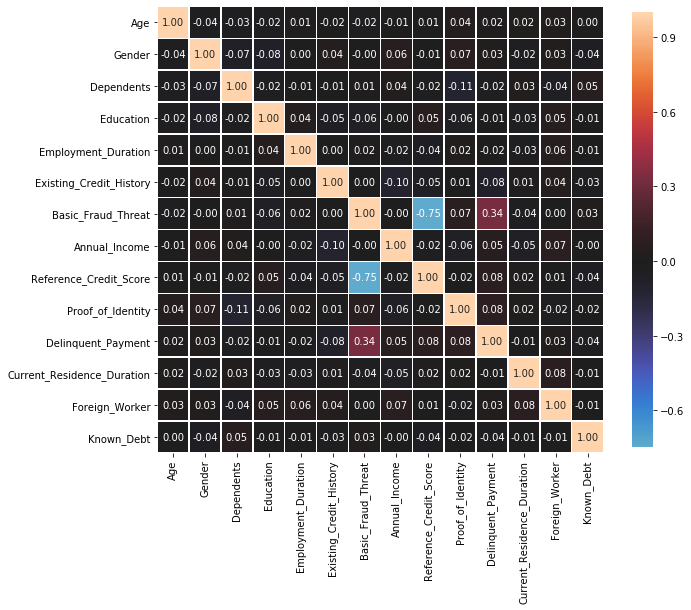

In [46]:
correlations = xtrain.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .80})
plt.show()

# Now, I scale my data
This is necessary because each feature in the dataset is in different units and magnitudes. Not scaling them will reduce the importance of smaller magnitude features, which leads to incorrect output.

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# Using Principal Component Analysis, I observe that I need all 14 features intact for accurate predictions

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(xtrain,ytrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
total=sum(pca.explained_variance_)
k=0
curr=0
while curr/total < 0.99:
    curr+=pca.explained_variance_[k]
    k=k+1
print(k)

14


# Now, I apply various regression algorithms to the data and find out the accuracy for each to choose the best one for these dataset

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [51]:
#Random Forest
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(xtrain,ytrain)
rfr.score(xtest,ytest)

0.8843871710496738

In [52]:
#Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(xtrain,ytrain)
gbr.score(xtest,ytest)

0.9717856287430141

In [53]:
# AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=100)
abr.fit(xtrain,ytrain)
abr.score(xtest,ytest)

0.8760349801959272

In [54]:
#Decision Trees
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
dtr.score(xtest,ytest)

0.7576127738900724

# It is observed that XGBRegressor gives the maximum accuracy

In [55]:
#Xgboost
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,verbosity=0)
xgb.fit(xtrain,ytrain)
final = xgb.predict(xtest)
xgb.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9740164651966604

# Now, I plot the testing data and predicted data together to observe amount of error
The blue dots depict the predicted value and red dots depict the true value

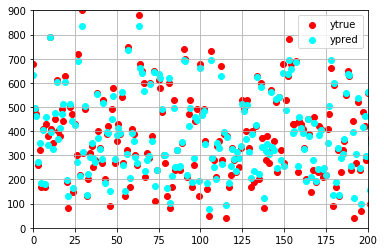

In [56]:
xaxis = [i for i in range(0,300)]
plt.scatter(xaxis,ytest,color='red',label="ytrue")
plt.scatter(xaxis,final,color='cyan',label="ypred")
plt.axis([0,200,0,900])
plt.legend()
plt.grid()
plt.show()